# Uczenie maszynowe: Lab3

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier

### Analiza modelu klasyfikacyjnego
* wziąć konkretne dane, podzielić na część treningową i testową lub uczyć wg. schematu walidacji
krzyżowej
* sprawdzić jakie są hiperparametry danego modelu i znaleźć optymalne
* uczyć parametry modelu z danych, po skończonej nauce je wypisać

In [49]:
warnings.filterwarnings('ignore', category=ConvergenceWarning)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

print(df)

data = df.values
X = data[:,:-1]
y = data[:,-1] # etykiety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test_size -> 80% training and 20% test
print ("\nX_test = ", X_test.shape)
print ("Y_test = ", y_test.shape,)
print ("X_train = ", X_train.shape)
print ("Y_train = ", y_train.shape)

# Walidacja krzyżowa k - fold
# Dzielimy na k równych podzbiorów (w których każdy z podzbiorów raz występuje jako zbiór uczący, a pozostała, połączona 
# część zbioru jest wykorzystywana jako zbiór testowy)

k = 10
cv = StratifiedKFold(n_splits=k)

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]

X_test =  (30, 4)
Y_test =  (30,)
X_train =  (120, 4)
Y_train =  (120,)


![Zrzut ekranu 2024-05-25 010304.png](<attachment:Zrzut ekranu 2024-05-25 010304.png>)
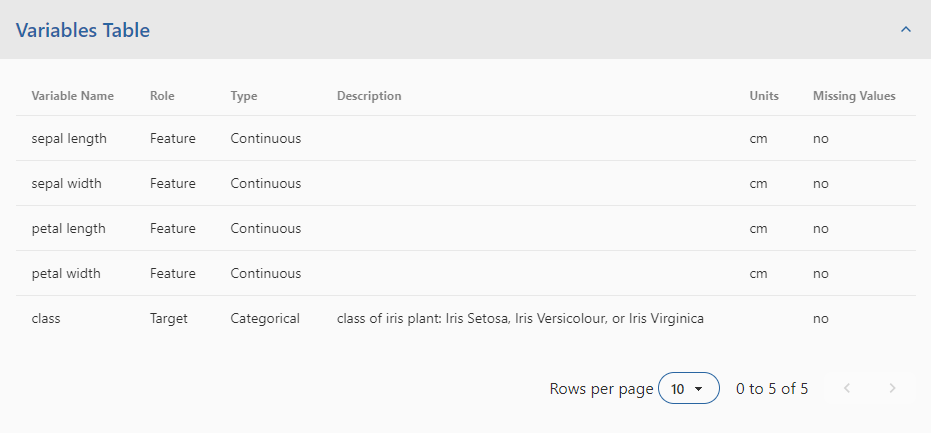

In [50]:
def evaluate_model(X_train, X_test, Y_train, Y_test, model, param_grid, cv):
    cross_val_scores = cross_val_score(model, X_train, Y_train, cv=cv, scoring='accuracy')

    # Walidacja krzyżowa - technika trenowania i testowania modelu na różnych podzbiorach danych
    print("\nWyniki walidacji krzyżowej: \n", cross_val_scores)
    print("Średni wynik walidacji krzyżowej: ", cross_val_scores.mean())

    # Grid Search -> wyszukanie najlepszych hiperparametrów
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy')
    grid_search.fit(X_train, Y_train)

    # Najlepsze hiperparametry
    best_params = grid_search.best_params_
    print(f"Najlepsze hiperparametry: {best_params}")

    # Trenowanie modelu z najlepszymi hiperparametrami
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, Y_train)

    # Predykcje i ocena na zbiorze testowym
    y_pred = best_model.predict(X_test)

    # Wyświetlanie wyuczonych parametrów (specyficznych dla Naive Bayes)
    if hasattr(best_model, 'class_prior_'):
        print("\nWyuczone parametry: \n", best_model.class_prior_)
        print("\nŚrednia: \n", best_model.theta_)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Dokładność na zbiorze testowym: {accuracy:.4f}")
    print("Raport klasyfikacji:\n", classification_report(y_test, y_pred))

    # Wypisanie końcowych parametrów modelu
    print("Końcowe parametry modelu:")
    print(best_model.get_params())

In [ ]:
# 1 - Naive Bayes
model = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 2 - kNN
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 3 - Drzewo decyzyjne
model = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 4 - Regresja logistyczna
model = LogisticRegression(max_iter=10000)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 5 - LDA
model = LinearDiscriminantAnalysis()
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 6 - MLP
model = MLPClassifier(max_iter=10000)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam']
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 7 - SVM
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}

evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [51]:
# 8 - Bagging
base_model = DecisionTreeClassifier()
model = BaggingClassifier(estimator=base_model, n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [0.5, 0.7, 1.0]
}
evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

TypeError: __init__() got an unexpected keyword argument 'base_estimator'

In [ ]:
# 9 - Boosting
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}
evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

In [ ]:
# 10 - Lasy losowe
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
evaluate_model(X_train, X_test, y_train, y_test, model, param_grid, cv)

### Uczenie nienadzorowane

### Inżynieria cech

Selekcja cech (różne algorytmy).

In [ ]:
# Dane
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

data = df.values
X = data[:,:-1]
y = data[:,-1]  # etykiety

# Trenowanie modelu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Tworzenie modelu Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Trening modelu bez selekcji cech
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność na zbiorze testowym (bez selekcji): {accuracy:.4f}")
print("Raport klasyfikacji (bez selekcji):\n", classification_report(y_test, y_pred))

# Selekcja cech na podstawie znaczenia cech
selector = SelectFromModel(rf, prefit=True)
X_train_rf = selector.transform(X_train)
X_test_rf = selector.transform(X_test)

# Trening modelu z selekcją cech (znaczenie cech)
model.fit(X_train_rf, y_train)
y_pred_rf = model.predict(X_test_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Dokładność na zbiorze testowym (znaczenie cech): {accuracy_rf:.4f}")
print("Raport klasyfikacji (znaczenie cech):\n", classification_report(y_test, y_pred_rf))

# Wybieranie najlepszych cech za pomocą testu ANOVA
selector = SelectKBest(score_func=f_classif, k=2)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

# Trenowanie modelu po selekcji cech
model.fit(X_train_best, y_train)
y_pred_best = model.predict(X_test_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Dokładność na zbiorze testowym (Univariate Selection): {accuracy_best:.4f}")
print("Raport klasyfikacji (Univariate Selection):\n", classification_report(y_test, y_pred_best))

Redukcja wymiarowości: Metoda PCA

In [46]:
# Wczytywanie danych
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None)

data = df.values
X = data[:,:-1]
y = data[:,-1]  # etykiety

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standaryzacja danych -> każda zmienna ma średnią 0 i wariancję 1 aby zmienne występujące w zbiorze danych były tej samej skali
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Trenowanie modelu bez redukcji wymiarowości
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność na zbiorze testowym (bez redukcji): {accuracy:.4f}")
print("Raport klasyfikacji (bez redukcji):\n", classification_report(y_test, y_pred))

# Redukcja wymiarowości za pomocą PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model.fit(X_train_pca, y_train)
y_pred_pca = model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nDokładność na zbiorze testowym (PCA): {accuracy_pca:.4f}")
print("Raport klasyfikacji (PCA):\n", classification_report(y_test, y_pred_pca))

Dokładność na zbiorze testowym (bez redukcji): 1.0000
Raport klasyfikacji (bez redukcji):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Dokładność na zbiorze testowym (PCA): 0.9000
Raport klasyfikacji (PCA):
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

